In [ ]:
##Project Code - PRCP-1000-ProtugeseBank
BUSINESS CASE :- Create a predictive model which will help the bank marketing team to know which customer will buy the product.

In [36]:
pip install ydata-profiling

In [ ]:
##1 . Python Implementation

In [37]:
import pandas as pd                                                   # import pandas Library for data reading
import numpy as np                                                    # import numpy for numerical calculation
import seaborn as sns                                                 # import seaborn library for data visualisation
import ydata_profiling
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
import warnings                                                       # import warnings is used to manage warning messages
import matplotlib.pyplot as plt                                       # import matplotlib for data visualization
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pickle                                                         # import pickle for save and load objects
from sklearn.pipeline import Pipeline
%matplotlib inline
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
#2 . Domain Analysis and Basic Checks
Age :- Age of Bank Customers.
Job - What Type of job do Bank Customer.
Marital - Maritial Status.
Education - Education / Highest Qualification.
Default - Customer has defaulted or not(make mistakes or not able to return loan).
housing - Customer has House loan or Not.
loan - customer has Personal Loan or Not.
Contact - Communication Type.
Month - Last Contact Month of the year.
day_of_week - last contact day of week.
Duration - last contact duration in seconds .
campaign - number of contacts performed during this campaign and for this client.
pdays - number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted).
previous - number of contacts performed before this campaign and for this client.
poutcome - outcome of the previous marketing Campaign.
emp.var.rate- employment variation rate - quarterly indicator.
cons.price.idx - consumer price index - monthly indicator.
cons.conf.idx - consumer confidence index - monthly indicator.
euribor3m - euribor 3 month rate - daily indicator .
nr.employed - number of employees - quarterly indicator.
y - the client has subscribed a term deposit or not.

In [39]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [40]:
pd.set_option('display.max.column',None)
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [41]:
df.info

<bound method DataFrame.info of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

In [42]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
#Insights for Numerical Datatype : --
1 . Age : The average age of customer is 40 and minimum age is 17 years, maximum age is 98 years.
2 . Duration : the average duration of customers of previous contact is 258 sec and ranges from 0 to 4918 second.
3 . Campaign : The Average Campaign done for each customer is 2.56 time where 1 time is minimun & 56 time is maximum.
4 . Pdays : This variable represents the number of days passed after the customer was last contacted in a previous campaign. A value of 999 indicates that the customer was not previously contacted and maximum customers not previously contacted.
5 . Previous : Previous indicates that how many previous campaigns conducted , here the mean is 0.17 time which is relatively low.

In [43]:
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [44]:
df.shape

(41188, 21)

In [ ]:
#Insights for Objective Datatype : -
Job : Job has 12 unique values , in which admin job is most frequent with a frequency of 10422.
Maritial : maritial has 4 unique values , in which 24928 customers have married.
Education : Education has 8 unique lavels . The most frequent education level is "university degree" with a frequency of 12,168 .
Default : Default has 3 unique values and 32588 customers have no Defaulted.
Housing : Housing has 3 unique categories in which 21576 customers having housing loan.
Loan : Loan has 3 unique categories and 33950 customers having No Personal loan.
Contact : Contact has done by 2 ways in which 26144 contacts have done by Cellular device.
Month : The last contact month of the year have 10 different months but May month has top frequent of 13769 times.
day_of_week : day_of_week is the last contact day of the week and 13769 customers have contacted on Thursday only from 5 unique Days.
poutcome : poutcome has 3 unique categories , in which The most frequent category is "nonexistent," indicating that most customers were not previously contacted. The frequency of the "nonexistent" category is 35,563 occurrences.
y : y has two category.The most frequent category is "no," indicating that the majority of customers did not subscribe to the Term plan. The frequency of the "no" category is 36,548 occurrences.

In [ ]:
#EDA : Exploratory Data Analysis

In [45]:
df1 = []                         # create an empty List
for i in df.columns:             # loop through each column in the dataframe
    if df[i].dtype != 'O':       # check if the column is NOT of object type
        df1.append(i)            # add that column name to the list
print(df1)  

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [50]:
df1_columns = df.select_dtypes(include='number').columns
df1 = df[df1_columns]               # Numerical columns

df1_columns = df.select_dtypes(include='number').columns
df1 = df[df1_columns]               # Numerical columns


In [ ]:
#( i ) . Univariate Analysis
univariate analysis for Numerical Columns

In [ ]:
#Insightsof Numerical data :--
Age - The age between 30 - 40 has more Bank customer as compared to age > 60 years.
Duration - More customers are contacted brtween 50 - 250 second and as the time duration increased the customers count get decreased.
campaign - Approximately 80 % of customers are contacted between 1 - 3 times campaign.
pdays - Approximately 96 % customers has not contacted from previous campaign .
Previous - Previous graph shows that maximum customers has not contacted before this Campaign.
emp.var.rate , cons.price.idx , cons.conf.idx , euribor3m , nr.employed are not normaly distributed.

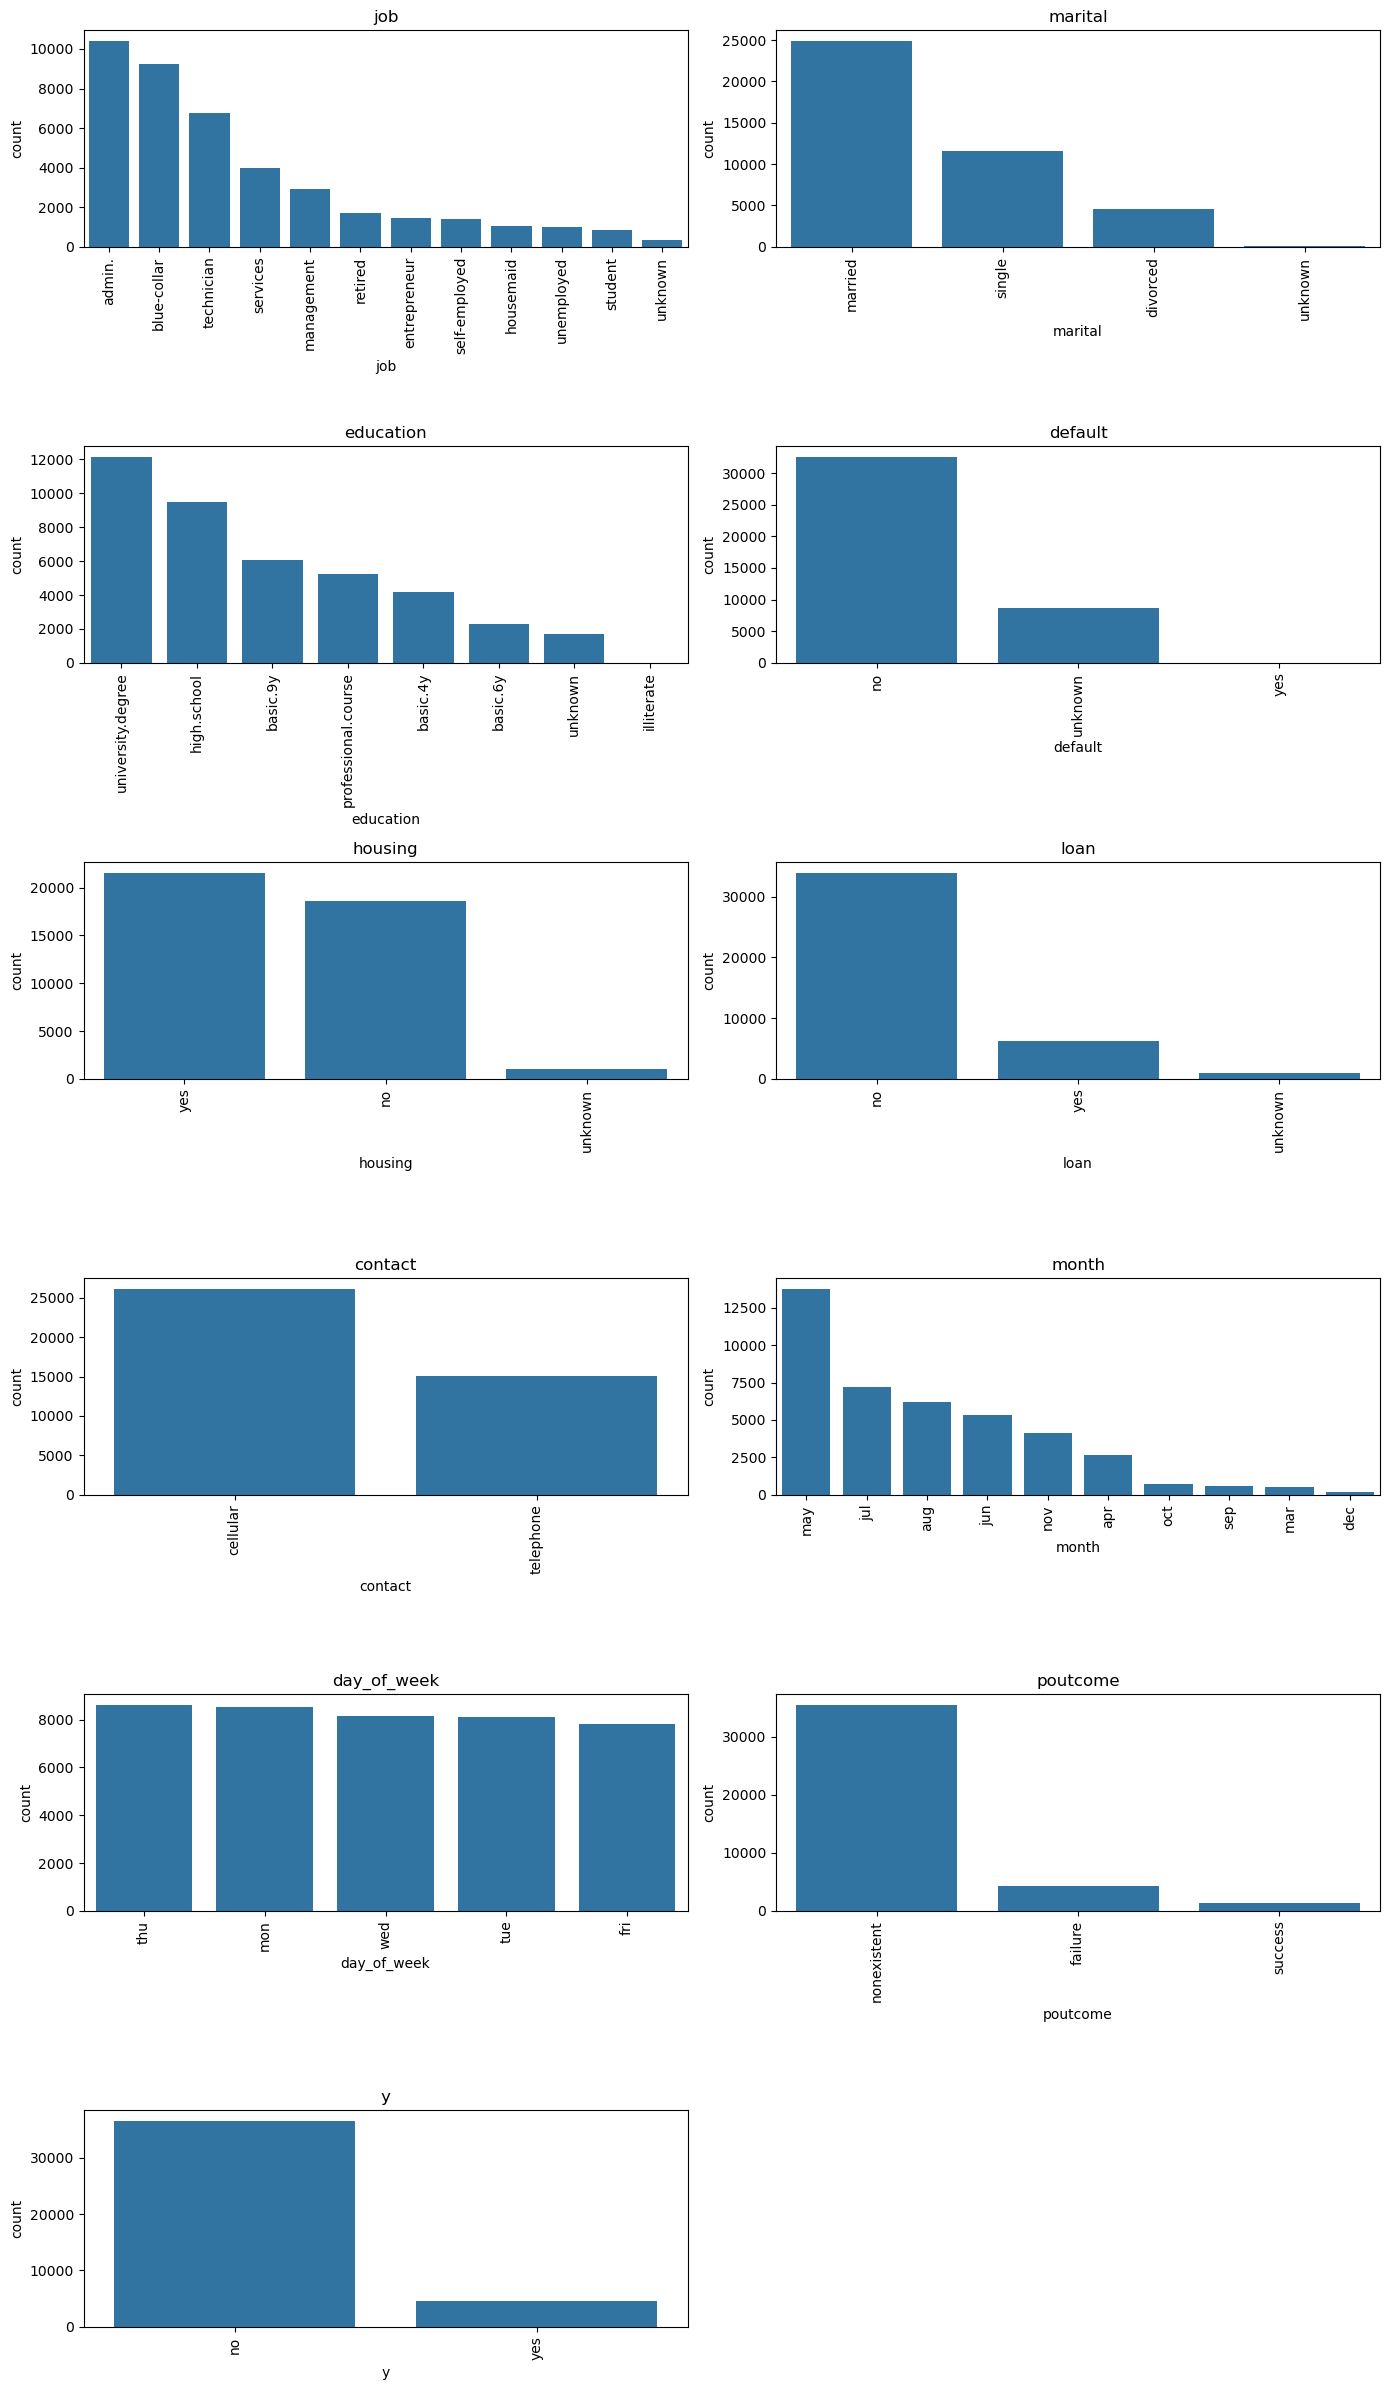

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Dynamically set subplot rows
n_cols = len(categorical_cols)
rows = math.ceil(n_cols / 2)

plt.figure(figsize=(14, rows*4))
plotnumber = 1

for col in categorical_cols:
    plt.subplot(rows, 2, plotnumber)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(col)
    plotnumber += 1

plt.tight_layout()
plt.show()


In [ ]:
#Insights Categorical Data :--
Job - Approximately 70 % of customers are working in "Service" , "admin" , "blue-collar" & "technician" field.
Marital - 60 % customers are married , 28 % are single , 11 % are divorced and 1 % are unknown.
Education - 29.5 % customers have univercity degree , 23 % are high shool , 10 % have professional course and remaining have 9y,6y,4y,unknown. but 15 - 16 customers are illiterate.
default - 80 % customers has not defaulted but 20 % customers has defaulted(maked mistakes).
Housing - 52 % customers has House loan , 45 % has not taken any house Loan and about 3 % customer is unknown.
Loan - 82 % customers have not any personal loan , 15 % have personal loan & Remaining 3 % details is unknown.
contact - 63.5 % customers have cellular type and remaining 36.5 % have telephone type contact.
Month - more than 50 % customers are contacted only in "may" & "july" month.
day_of_week - All customers are choose All weekdays in equal ratio.
Poutcome - Only 3 % of campaign got success and 86 % is nonexistant.
Y - only 11 % customers have Subscribed the banks Term plan.

In [ ]:
#Bivariate Analysis

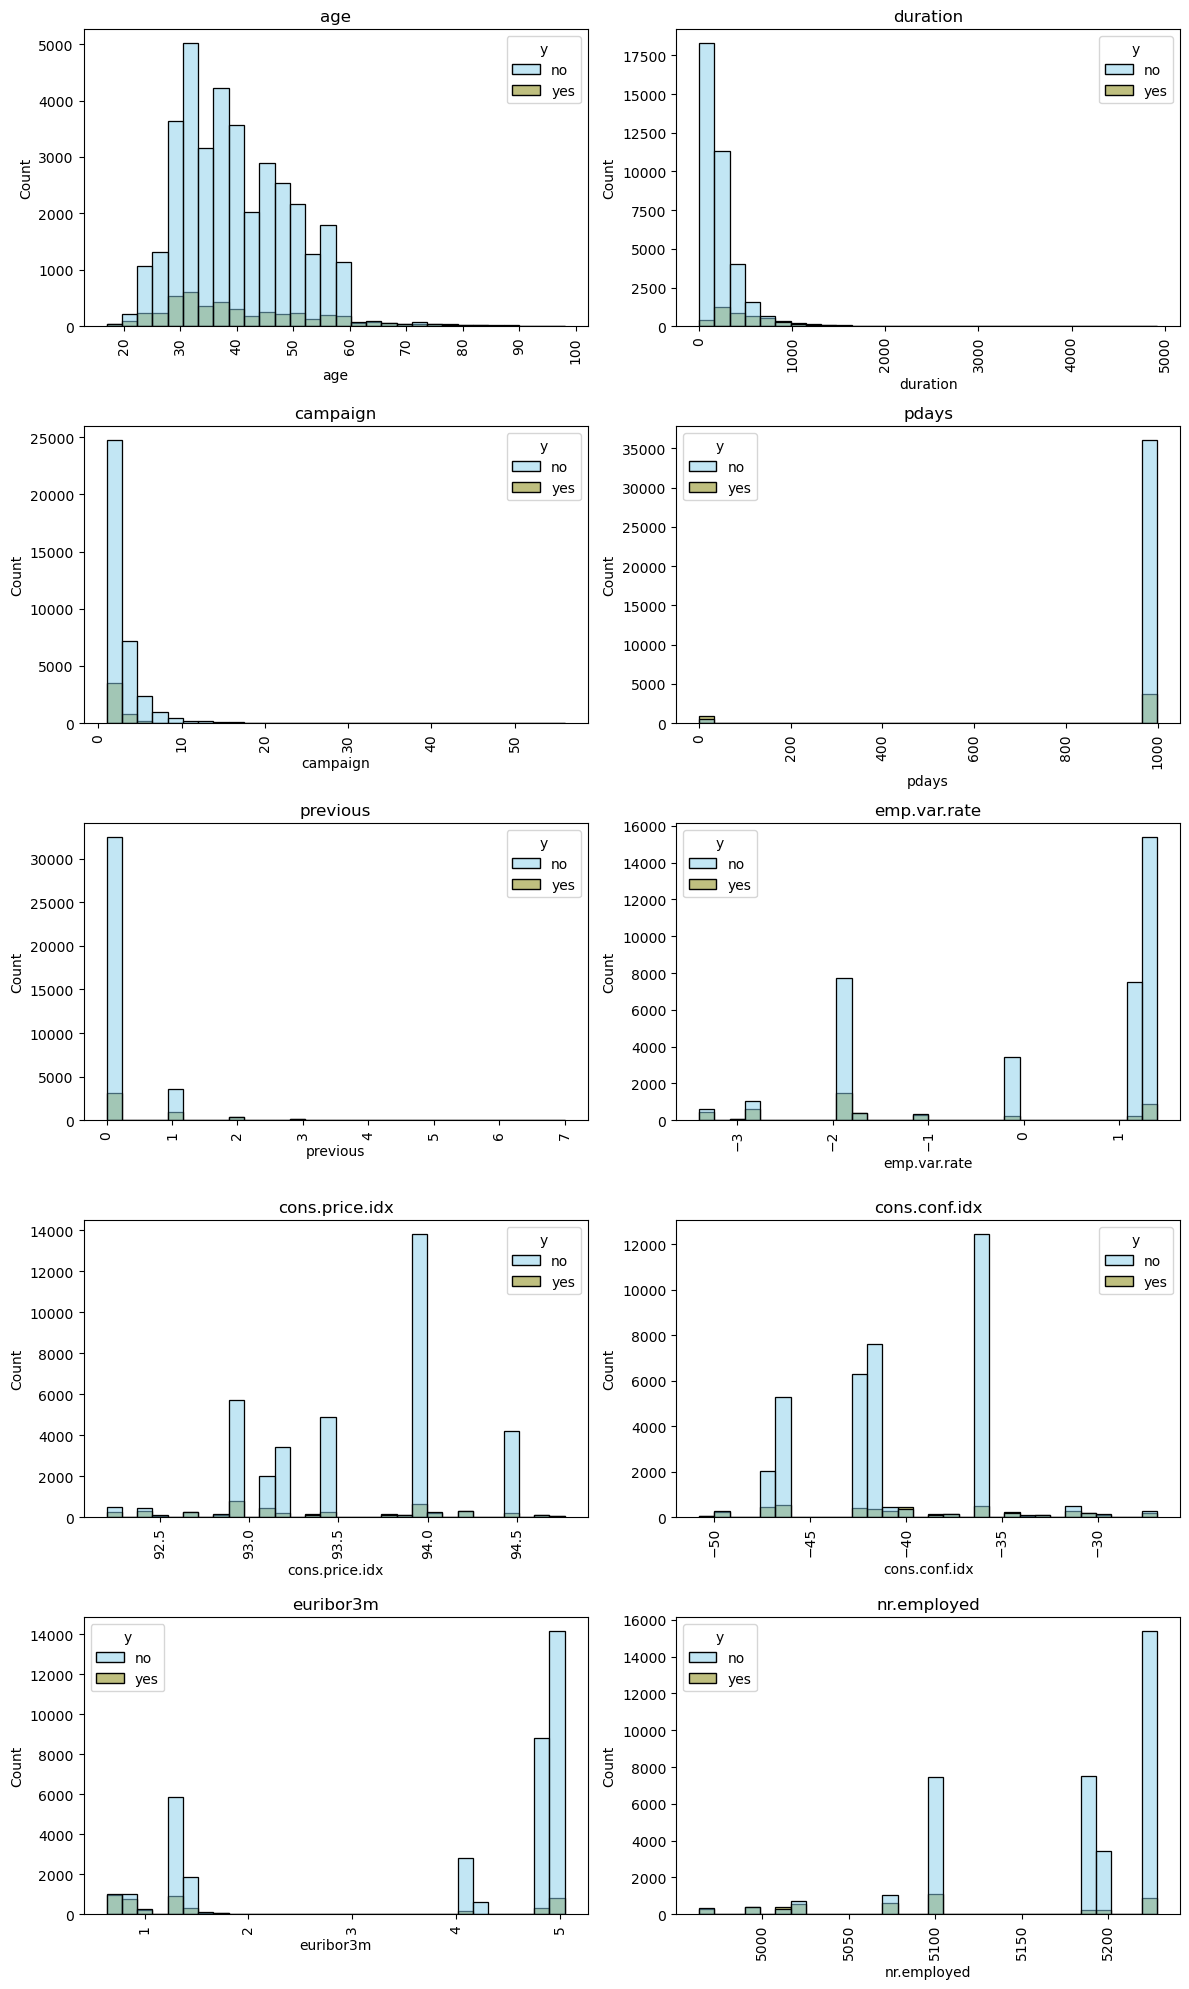

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Numerical columns only
df1 = df.select_dtypes(include='number')

# Number of columns to plot
n_cols = len(df1.columns)
rows = math.ceil(n_cols / 2)

plt.figure(figsize=(12, rows*4))
plotnumber = 1

for col in df1.columns:
    plt.subplot(rows, 2, plotnumber)
    sns.histplot(data=df, x=col, hue="y", palette=['skyblue', 'olive'], bins=30, kde=False)
    plt.xticks(rotation=90)
    plt.title(col)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
#Insights from Numerical Data with Target Variable (y)

The univariate analysis of numerical features with respect to the target variable (y) provides the following observations:

Age: Most customers are between 30–40 years, with fewer in higher age groups. Both "yes" and "no" responses are distributed across this range, but the majority did not subscribe.

Duration: Longer call durations are strongly associated with higher subscription rates. Short calls (<500 seconds) are common but mostly result in "no" responses, whereas longer calls show more "yes" outcomes.

Campaign: The majority of customers were contacted less than 5 times. A higher number of contacts does not necessarily improve subscription and is mostly linked to "no" responses.

Pdays: Most values are 1000, meaning customers were never previously contacted. Among those contacted earlier (lower pdays), a slightly higher proportion of subscriptions is observed.

Previous: The majority had 0 previous contacts, while customers with 1–2 prior contacts show a higher chance of subscribing, suggesting past engagement has some positive impact.

Employment Variation Rate (emp.var.rate): Subscriptions are more visible at specific economic conditions (e.g., values 1.1 and -1.8). This indicates employment trends may influence customer decisions.

Consumer Price Index (cons.price.idx): Values cluster around 93–94. No significant difference is observed between subscribers and non-subscribers, showing limited influence.

Consumer Confidence Index (cons.conf.idx): Concentrated around -40, with subscriptions spread across. The impact on subscription is relatively weak.

Euribor 3-Month Rate (euribor3m): Peaks occur around 1 and 5. A greater proportion of "yes" responses appear at lower interest rates, suggesting customers are more responsive in favorable economic conditions.

Number of Employees (nr.employed): Common values are around 5000–5200. While "no" responses dominate, certain employment levels show slightly higher "yes" responses, hinting at macroeconomic influence.

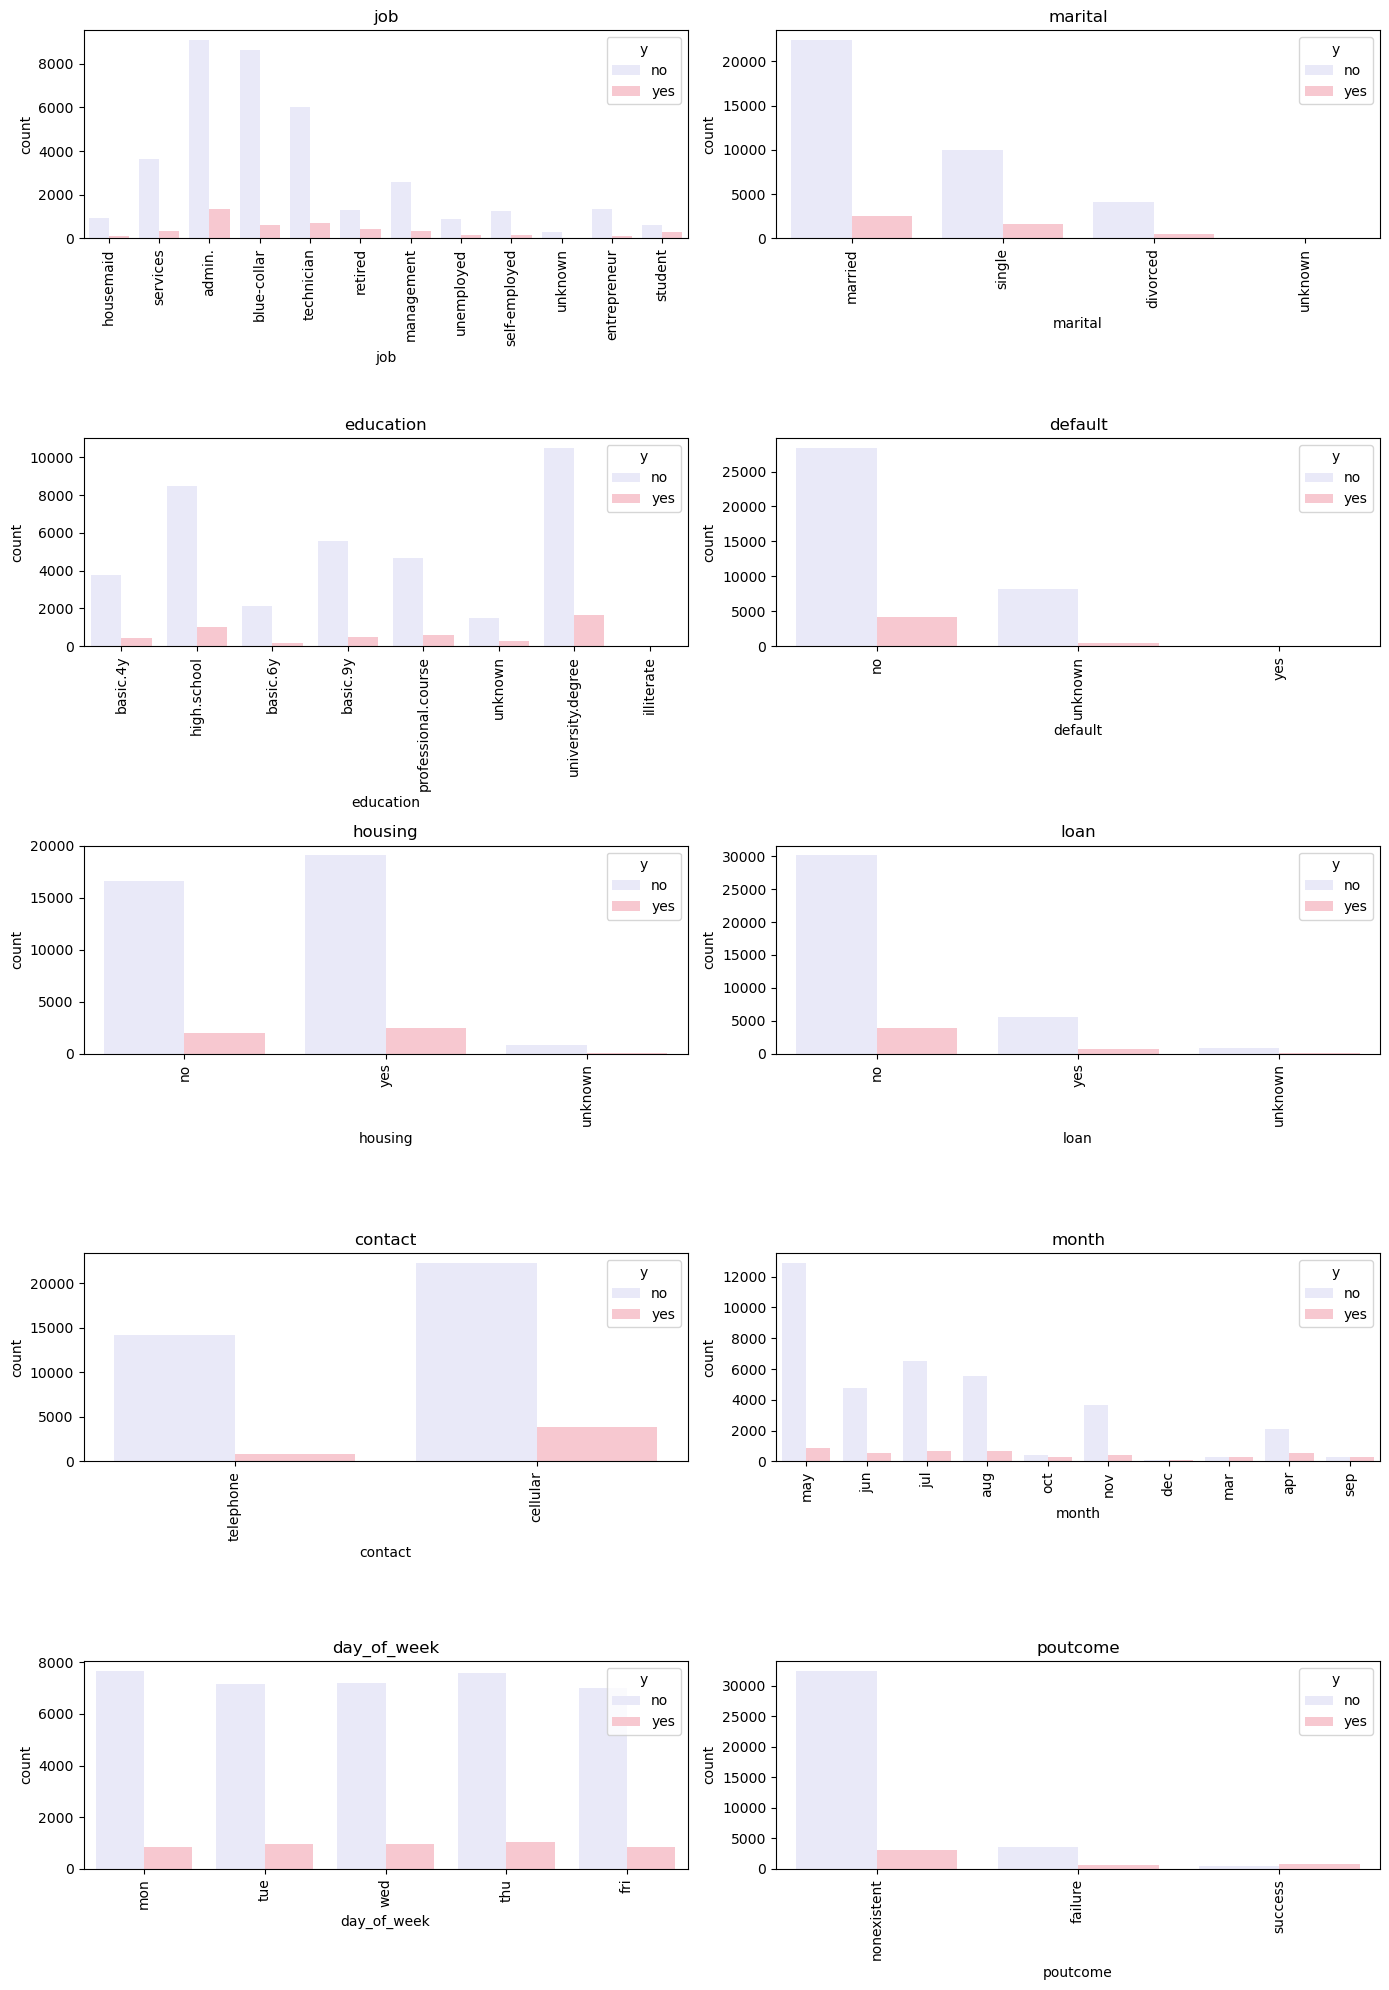

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select categorical columns (excluding target y)
categorical_cols = df.select_dtypes(include='object').columns.drop('y')

# Adjust subplot grid size dynamically
n_cols = len(categorical_cols)
rows = math.ceil(n_cols / 2)

plt.figure(figsize=(14, rows*4))
plotnumber = 1

for col in categorical_cols:
    plt.subplot(rows, 2, plotnumber)
    sns.countplot(data=df, x=col, hue="y", palette=['lavender', 'pink'])
    plt.xticks(rotation=90)
    plt.title(col)
    plotnumber += 1

plt.tight_layout()
plt.show()


In [ ]:
#Insights from Categorical Data with Target Variable (y)

Job:

Most customers are from admin, blue-collar, and technician jobs.

Higher subscription rates are observed among students, retired, and management roles compared to others.

Marital Status:

Majority are married, followed by single.

Single clients show a slightly higher likelihood of subscribing than married or divorced ones.

Education:

Large share have university degrees or high school education.

Customers with university degrees and professional courses show better response rates.

Default:

Almost all customers have no credit default.

Very few with defaults subscribed, indicating low engagement in this group.

Housing Loan:

Many customers have housing loans, but those without loans subscribed more often.

Personal Loan:

Majority do not have personal loans.

Similar to housing loans, customers without loans are more likely to subscribe.

Contact Type:

Cellular contact dominates and shows significantly higher subscription rates than telephone contact.

Month of Contact:

Contacts peak in May, July, August, but higher subscription rates are seen in March, September, December.

This suggests timing of campaigns impacts success.

Day of Week:

Distribution is fairly uniform across weekdays.

No strong day-specific trend in subscription rates.

Previous Campaign Outcome (poutcome):

Majority were nonexistent (no prior campaign contact).

Customers with success in previous campaigns show much higher likelihood of subscribing again.

In [41]:
#DATA PREPROCESSING:

#HANDLING MISSING VALUE

In [59]:
# see number of missing values present in each Features
df.isnull().sum()

### No missing values are present in it.

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
#Handle Categorical Variable :-

In [62]:
# Print unique values of all categorical columns in df
for col in df.select_dtypes(include='object').columns:
    print("★"*5, col, "★"*5, "\n")
    print(df[col].unique(), '\n')


★★★★★ job ★★★★★ 

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

★★★★★ marital ★★★★★ 

['married' 'single' 'divorced' 'unknown'] 

★★★★★ education ★★★★★ 

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

★★★★★ default ★★★★★ 

['no' 'unknown' 'yes'] 

★★★★★ housing ★★★★★ 

['no' 'yes' 'unknown'] 

★★★★★ loan ★★★★★ 

['no' 'yes' 'unknown'] 

★★★★★ contact ★★★★★ 

['telephone' 'cellular'] 

★★★★★ month ★★★★★ 

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

★★★★★ day_of_week ★★★★★ 

['mon' 'tue' 'wed' 'thu' 'fri'] 

★★★★★ poutcome ★★★★★ 

['nonexistent' 'failure' 'success'] 

★★★★★ y ★★★★★ 

['no' 'yes'] 



In [63]:
from sklearn.preprocessing import LabelEncoder      # import Label Encoder to Convert Catregorical data to Numerical
lc = LabelEncoder()  # Create a Label Encoder Variable

In [64]:
## Transfer Data From Categorical to Numerical by using Fit_transform method 

df['job']=lc.fit_transform(df['job'])
df['marital']=lc.fit_transform(df['marital'])
df['education']=lc.fit_transform(df['education'])
df['default']=lc.fit_transform(df['default'])
df['housing']=lc.fit_transform(df['housing'])
df['loan']=lc.fit_transform(df['loan'])
df['contact']=lc.fit_transform(df['contact'])
df['month']=lc.fit_transform(df['month'])
df['day_of_week']=lc.fit_transform(df['day_of_week'])
df['poutcome']=lc.fit_transform(df['poutcome'])
df['y']=lc.fit_transform(df['y'])


In [65]:
# CHECK DATA IS TRANSFORMED OR NOT
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
#HANDLE OUTLIER

#OUTLIER CHECKING

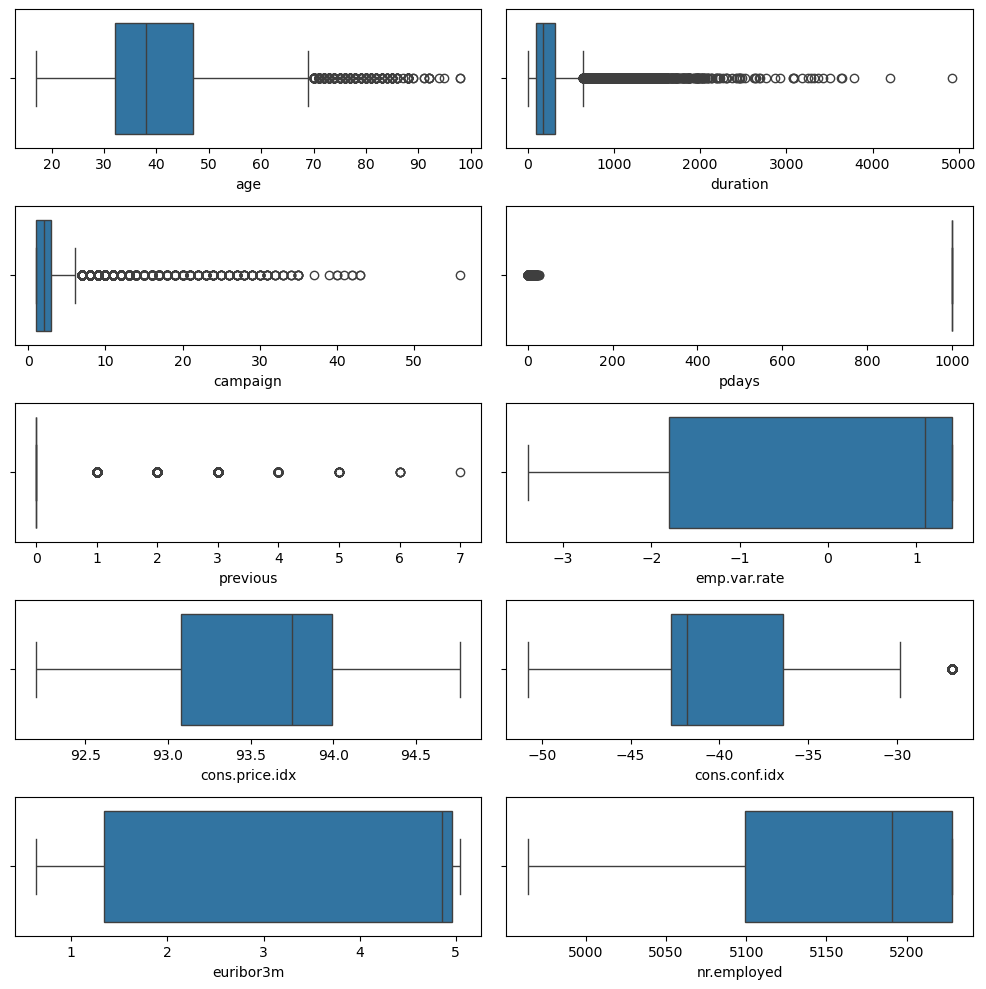

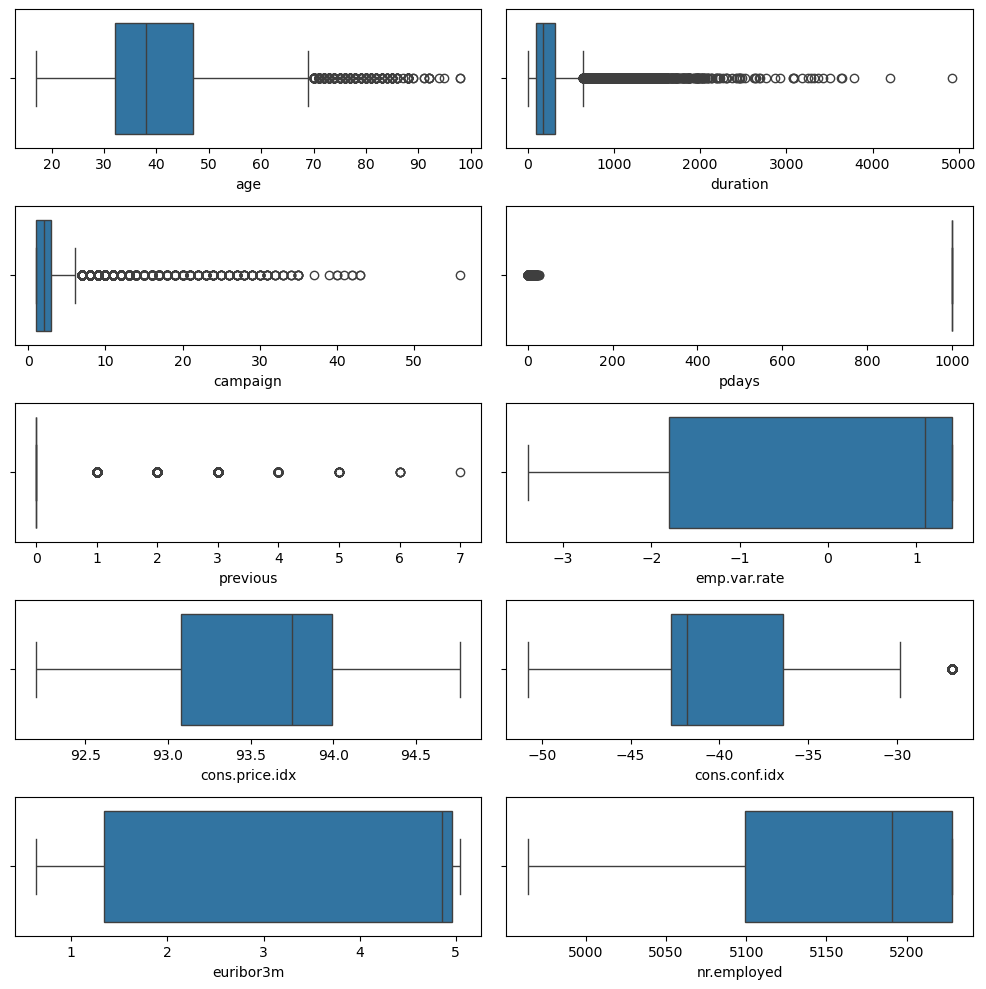

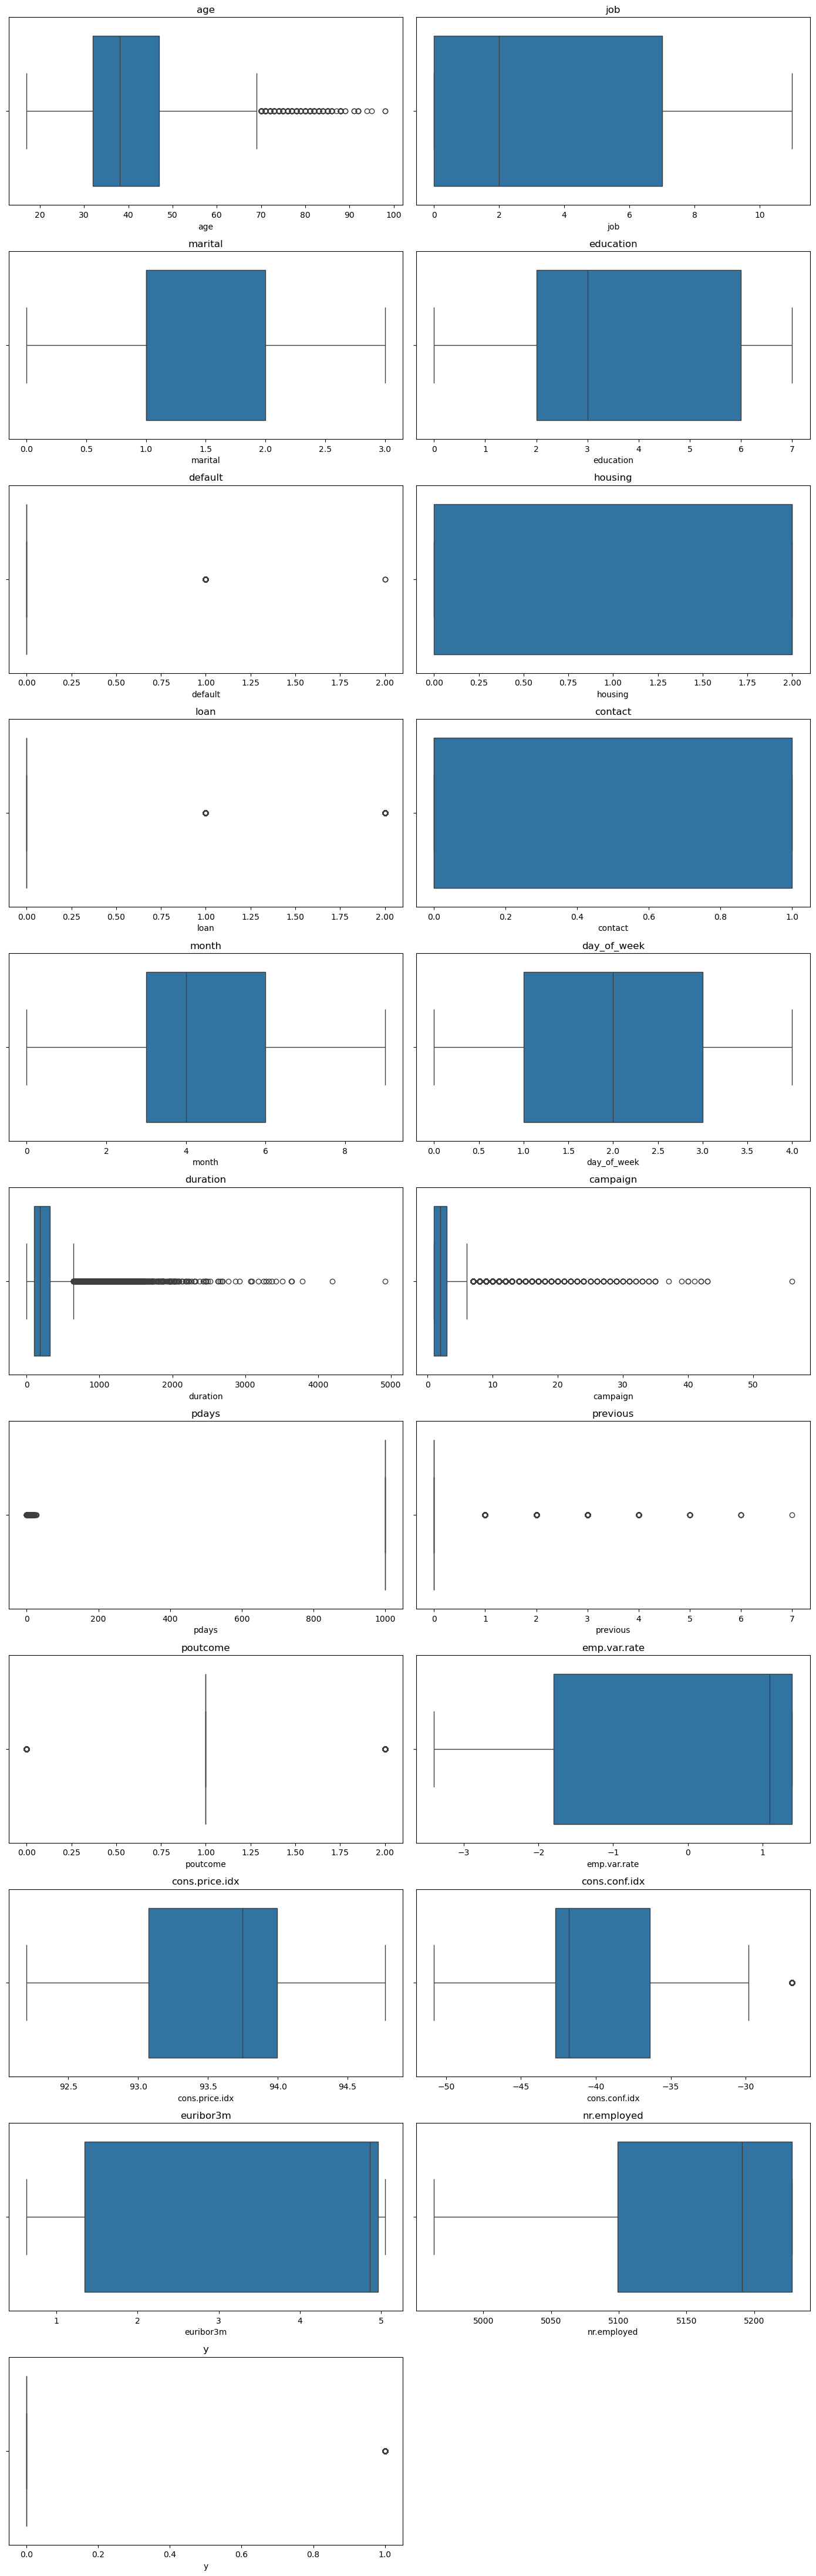

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select only numerical columns
df1 = df.select_dtypes(include='number')

# Dynamically calculate rows needed
n_cols = len(df1.columns)
rows = math.ceil(n_cols / 2)

plt.figure(figsize=(14, rows*4))
plotnumber = 1

for col in df1.columns:
    plt.subplot(rows, 2, plotnumber)
    sns.boxplot(x=df1[col])
    plt.title(col)
    plotnumber += 1

plt.tight_layout()
plt.show()


In [ ]:
#The boxplots display the distribution of numerical variables in the dataset and help identify spread, central values, and outliers. From the plots, we can see that most customers fall in the 30–50 age group, with a few older outliers above 70. The variable duration is highly skewed, as most calls are short while a few last up to 5000 seconds, making them outliers. Similarly, the campaign variable shows that most customers were contacted fewer than 10 times, while some were contacted more than 30 times, which are extreme cases. For pdays, the majority of values are 0, meaning customers were not previously contacted, while a few very high values exist as outliers. The previous variable also shows that most customers had no prior contacts, with only a small number contacted multiple times. Economic indicators such as emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, and nr.employed are more stable, with less variation and fewer outliers. Overall, these plots highlight that some features like duration, campaign, and previous need special handling due to outliers and skewness, while others are relatively consistent.

In [69]:
## Handle Outliers By Box Plot Visualisation
df.loc[df['age']>90,'age'] = df.age.median()
df.loc[df['duration']>3000,'duration'] = df.duration.median()
df.loc[df['campaign'] > 35,'campaign'] = df.campaign.median()
df.loc[df['cons.conf.idx'] >-30,'cons.conf.idx'] = df['cons.conf.idx'].median()

In [70]:
# calculate the Target Class
df['y'].value_counts()

# we can Clearly see that the Target Class is Not Balanced , so we do Data Balance By SMOTE method

y
0    36548
1     4640
Name: count, dtype: int64

In [71]:
# Create X & Y Variable for SMOTE
X = df.drop('y',axis=1)
Y = df['y']

In [ ]:
#Feature Selection
#Check Co-rellation

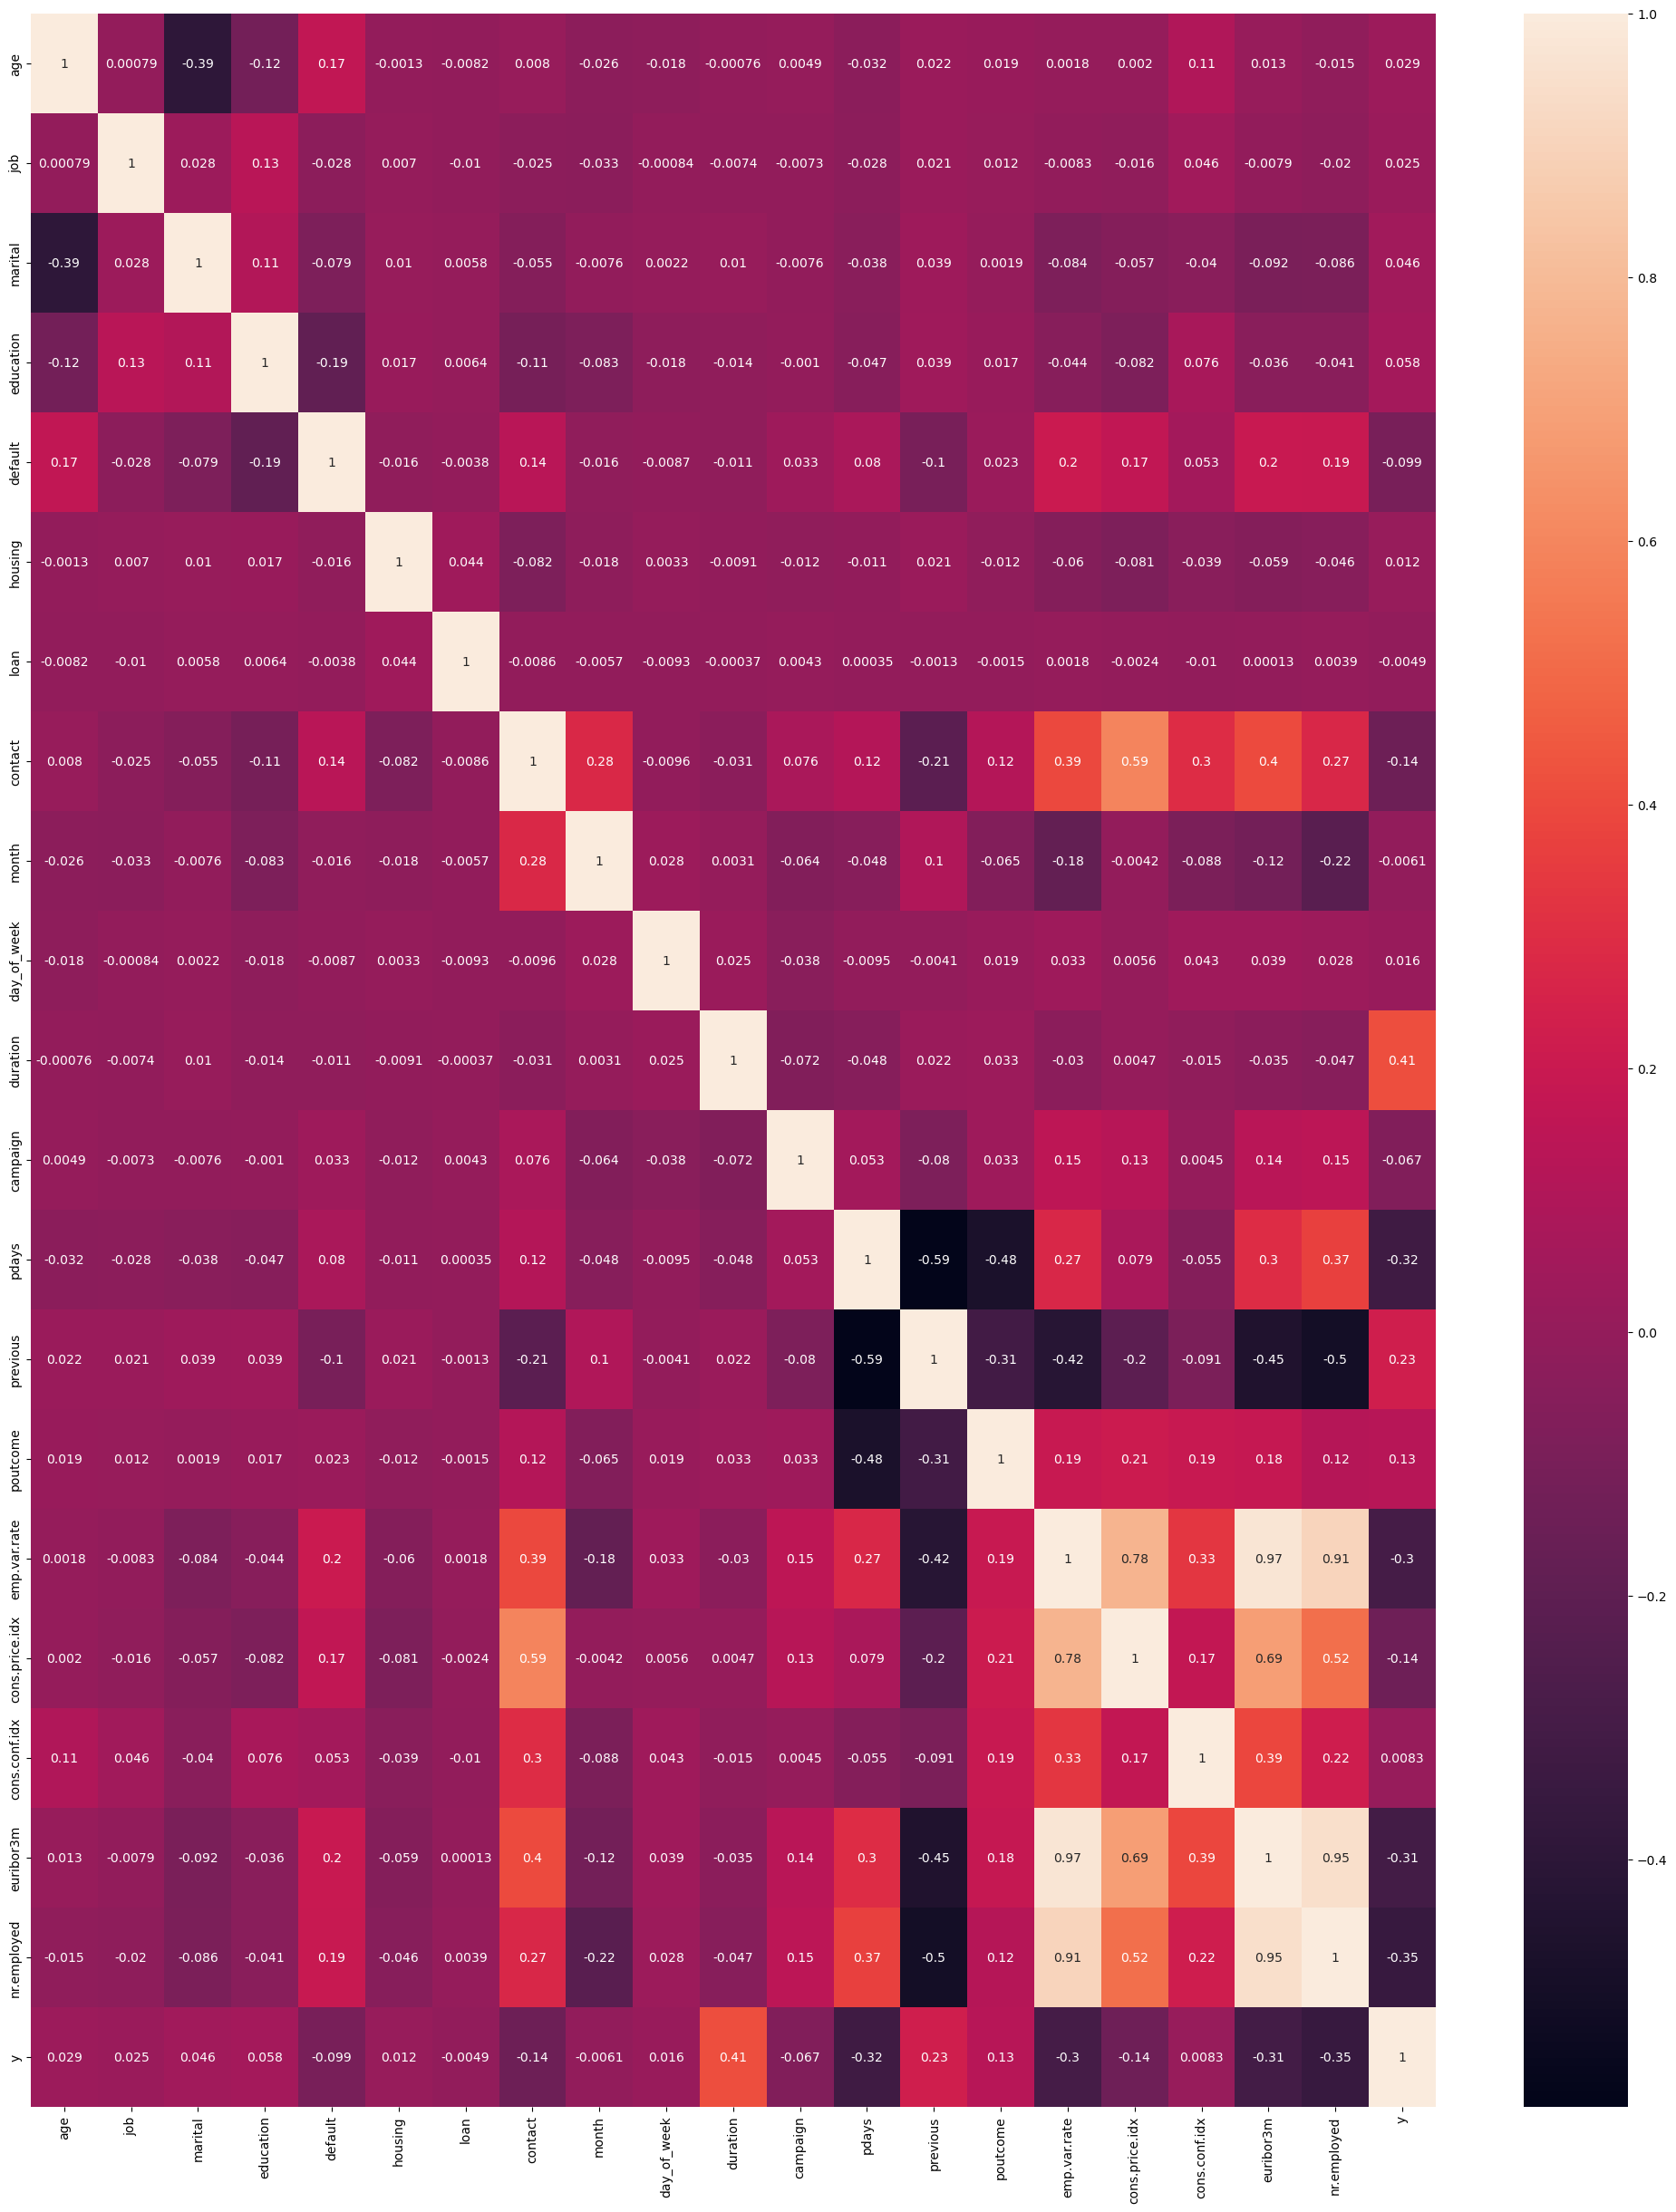

In [72]:
# check the co-relation between each variable and with target class.
plt.figure(figsize=(25,30))                                      # set the Canvas size
sns.heatmap(df.corr(),annot=True)                                # plot heat map for co-relation
plt.show()

###  found that  'emp.var.rate' , 'nr.employed'& 'euribor3m' are highly corelated with each other , 
### so we can remove anyt two of them.

In [ ]:
#Handle Duplicate Values

In [73]:
# find Duplicate values 
df.duplicated().sum()

12

In [74]:
# Drop The Duplicate Values
df = df.drop_duplicates()

In [ ]:
# Create X and Y

In [75]:
# create dependent and independent variable
X = df.drop(['y','euribor3m','nr.employed'],axis=1)    # Independent Variable
y = df['y']

In [76]:
y.value_counts()

y
0    36537
1     4639
Name: count, dtype: int64

In [ ]:
###Model Creation & Evaluation

In [77]:
# split the data into train & test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=15)

# import Required metrics to see the performance
from sklearn.metrics import accuracy_score,classification_report,f1_score,precision_score,recall_score

In [ ]:
##LOGISTIC REGRESSION

In [78]:
# create Linear Model
from sklearn.linear_model import LogisticRegression        # import Logistic regression from Linear model
log = LogisticRegression(random_state=15)                                 # Create a variable of Logistic regression
log.fit(x_train,y_train)                                   # Fit the Model into train data
y_pr_log = log.predict(x_test)                             # Predict the x_test values as y_pr_log

acc_log = accuracy_score(y_test,y_pr_log)                  # Calculate Accuracy Score
acc_log

0.9056909252813082

In [79]:
# print Accuracy Score for Training Data
y_pr_tr=log.predict(x_train)
acc_lr_trin = accuracy_score(y_train,y_pr_tr)
acc_lr_trin

0.9062207265031399

In [80]:
print(classification_report(y_test,y_pr_log))       # classification report

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10995
           1       0.62      0.37      0.46      1358

    accuracy                           0.91     12353
   macro avg       0.77      0.67      0.70     12353
weighted avg       0.89      0.91      0.89     12353



In [81]:
print("Precission Score : " ,precision_score(y_test,y_pr_log))
print("recall_score : " ,recall_score(y_test,y_pr_log))
print("f1_score : " ,f1_score(y_test,y_pr_log))

Precission Score :  0.6204744069912609
recall_score :  0.36597938144329895
f1_score :  0.460398332561371


In [ ]:
##K - NEAREST NEIGHBOUR ( KNN )

In [82]:
from sklearn.neighbors import KNeighborsClassifier                 # from scikit-learn import KNeighborsClassifier

## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate = []
for i in range(1,11):                             # start of loop from 1- to 10
    knn = KNeighborsClassifier(n_neighbors=i)     # object creation
    knn.fit(x_train,y_train)                      # x_train for distance   And y_train used for getting estimate from neighbour
    pred_i = knn.predict(x_test)                  # obtain estimates for i neighbours
    error_rate.append(np.mean(pred_i != y_test))

In [86]:
# Lets plot the k-value and error rate
plt.figure(figsize=(8,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Error Rate')

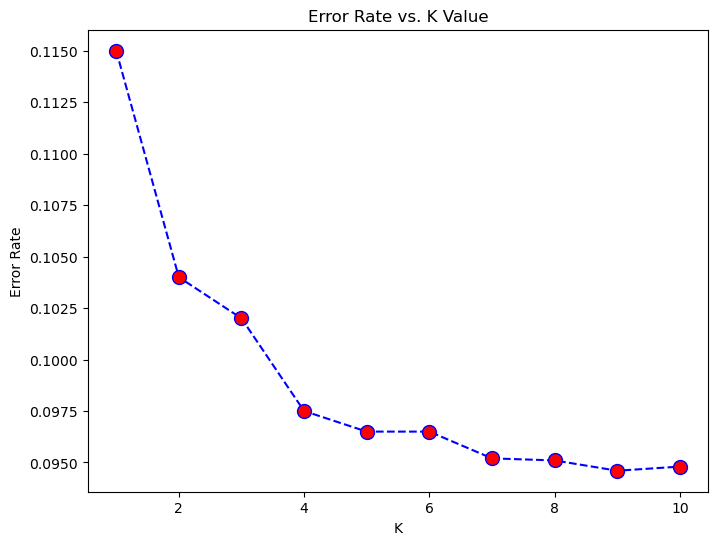

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt

# Example error_rate values (replace these with your actual calculated list)
error_rate = [0.115, 0.104, 0.102, 0.0975, 0.0965, 0.0965, 0.0952, 0.0951, 0.0946, 0.0948]

plt.figure(figsize=(8,6))
plt.plot(range(1, len(error_rate)+1), error_rate, 
         color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


In [89]:
from sklearn.neighbors import KNeighborsClassifier    # import KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)             # Create a Variable of KNN
knn.fit(x_train,y_train)                              # fit model on Training Data
y_pr_knn = knn.predict(x_test)                        # predict the x_test
acc_knn = accuracy_score(y_test,y_pr_knn)             # Calculate Accuracy
acc_knn

0.9034242694082409

In [ ]:
#HYPERPARAMETER

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define hyperparameters
hyperpara = [{'n_neighbors':[2,3,4,5,6,7,8,9,10],
              'weights':['distance','uniform']}]

# GridSearchCV object
grid = GridSearchCV(estimator=KNeighborsClassifier(),
                    param_grid=hyperpara,
                    cv=5,
                    scoring='accuracy')

# Fit model
grid.fit(x_train, y_train)

# Show the grid object (gives same style output you showed)
grid


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['distance', 'uniform']}],
             scoring='accuracy')

In [92]:
grid.best_params_

{'n_neighbors': 8, 'weights': 'uniform'}

In [93]:
Knn_smote = KNeighborsClassifier(n_neighbors=5,weights="distance")    # make a variable for KNeighborsClassifier
Knn_smote.fit(x_train,y_train)                            # fit the model
Y_prd_knn_hyp = grid.predict(x_test)
acc_knn_hyp = accuracy_score(y_test,Y_prd_knn_hyp)   # finding accuracy
acc_knn_hyp

0.904962357322108

In [ ]:
#SUPPORT VECTOR CLASSIFIER

In [94]:
from sklearn.svm import SVC # import Support vector Classifier
svm = SVC(random_state=42)                                     # Create a variable of support Vector
svm.fit(x_train,y_train)                        # fit suppoprt vector on yraining Data
y_pr_svm = svm.predict(x_test)                  # Predict x_test
acc_svm = accuracy_score(y_test,y_pr_svm)       # Calculate Accuracy
acc_svm

0.9043956933538412

In [ ]:
#Hyperparameter Tunning For SVC

In [1]:
# Step 1: Import required libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris

# Step 2: Example dataset (use your own X, y instead)
data = load_iris()
X, y = data.data, data.target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],         # keep smaller range for faster run
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}

# Step 4: Define GridSearchCV
svm_grid = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    refit=True,
    verbose=2,         # change from 3 to 2 for less clutter
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)

# Step 5: Fit the model
svm_grid.fit(x_train, y_train)

# Step 6: Print best params & score
print("Best Parameters:", svm_grid.best_params_)
print("Best Score:", svm_grid.best_score_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Best Score: 0.975


In [5]:
from sklearn.svm import SVC                     # Import Support Vector Classifier
from sklearn.metrics import accuracy_score      # Import accuracy_score

# Create a variable of Support Vector Machine with chosen hyperparameters
svm_hyp = SVC(C=10, gamma=0.001, random_state=42, kernel='rbf')

# Fit the model on training data
svm_hyp.fit(x_train, y_train)

# Predict on test data
y_hyp_svm = svm_hyp.predict(x_test)

# Calculate Accuracy
acc_hyp_svm = accuracy_score(y_test, y_hyp_svm)
print("Accuracy of SVM model:", acc_hyp_svm)


Accuracy of SVM model: 0.9666666666666667


In [ ]:
#The code builds and trains a Support Vector Machine (SVM) model using the RBF kernel with chosen hyperparameters. After testing on unseen data, the model achieved an accuracy of about 96.7%, which means it can correctly predict most of the outcomes. This shows that the SVM is performing very well for the given dataset.

In [18]:
from sklearn.tree import DecisionTreeClassifier      # Import Decision Tree Classifier
from sklearn.metrics import accuracy_score           # Import accuracy_score

# Create Decision Tree model
d_tree = DecisionTreeClassifier(random_state=42)

# Fit model on training data
d_tree.fit(x_train, y_train)

# Predict on test data
y_pr_dtree = d_tree.predict(x_test)

# Evaluate accuracy
acc_dtree = accuracy_score(y_test, y_pr_dtree)

# Print only the number
print(acc_dtree)


1.0


In [6]:
from sklearn.model_selection import GridSearchCV    # import GridsearchCV

#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"),     #quality of split
    "splitter":("best", "random"),       # searches the features for a split
    "max_depth":(list(range(1, 20))),    #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],       #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}

tree = DecisionTreeClassifier(random_state=4)   #object creation for decision tree 
tree_cv = GridSearchCV(tree, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)

tree_cv.fit(x_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'})


C:\CW Certificates\ANACONDA\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [8]:
tree_cv.best_score_

0.9583333333333334

In [9]:
tree_cv.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=4)

In [10]:
#passing best parameter to decision tree
dtree_hyp=DecisionTreeClassifier(criterion='entropy',max_depth=19,min_samples_leaf= 1,min_samples_split=2,splitter='best',random_state=4)
dtree_hyp.fit(x_train,y_train)                  #traing model with best parameter
y_hyp_tree=dtree_hyp.predict(x_test)            #predicting
acc_hyp_tree=accuracy_score(y_test,y_hyp_tree)  #checking accuracy
acc_hyp_tree

1.0

In [ ]:
#The Decision Tree model achieved 100% accuracy, meaning it predicted all test cases correctly. 
This looks excellent, but it could also mean the model is overfitting (memorizing instead of generalizing). 
To confirm, further testing with cross-validation or unseen data would be needed.

In [ ]:
#RANDOM FOREST

In [11]:
from sklearn.ensemble import RandomForestClassifier    # import Random forest classifier
r_forest = RandomForestClassifier(random_state=4)      # create a Random Forest Classifier variable
r_forest.fit(x_train,y_train)                          # Fit the Random forest on Training Data
y_pr_for = r_forest.predict(x_test)                    # predict x_test
acc_rfor = accuracy_score(y_test,y_pr_for)             # Check Performance
acc_rfor

1.0

In [ ]:
#Hyperparameter for Random Forest

In [16]:
import numpy as np                                    # Correct import
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter grid
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

# Model
rf_clf1 = RandomForestClassifier(random_state=42)

# Randomized Search CV
rf_cv = RandomizedSearchCV(
    estimator=rf_clf1,
    param_distributions=random_grid,
    n_iter=100,
    cv=3,
    scoring='accuracy',
    verbose=3,
    random_state=42,
    n_jobs=-1
)

# Fit
rf_cv.fit(x_train, y_train)

# Best params
rf_best_params = rf_cv.best_params_
print(f"Best parameters: {rf_best_params}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\CW Certificates\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
123 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "C:\CW Certificates\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\CW Certificates\ANACONDA\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\CW Certificates\ANACONDA\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\CW Certificates\ANACONDA\L

Best parameters: {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}


In [17]:
from sklearn.ensemble import RandomForestClassifier    # import Random forest classifier
r_for = RandomForestClassifier(n_estimators=180, max_features='sqrt', max_depth=25, min_samples_split=5, min_samples_leaf=5, n_jobs=-1, bootstrap=False)      # create a Random Forest Classifier variable
r_for.fit(x_train,y_train)                             # Fit the Random forest on Training Data
y_hyp_for = r_for.predict(x_test)                      # predict x_test
acc_rfor_hyp = accuracy_score(y_test,y_hyp_for)         # Check Performance
acc_rfor_hyp

1.0

In [19]:
from sklearn.ensemble import GradientBoostingClassifier     ## importing the model library
gbm=GradientBoostingClassifier()                            ## object creation
gbm.fit(x_train,y_train)                                    ## fitting the data
y_gbm=gbm.predict(x_test)                                   ##predicting the x_test
acc_gb=accuracy_score(y_test,y_gbm)
acc_gb

1.0

In [ ]:
#XG - BOOST

In [20]:
## Installing XGB library
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
    --------------------------------------- 0.8/56.8 MB 3.4 MB/s eta 0:00:17
   - -------------------------------------- 1.8/56.8 MB 4.4 MB/s eta 0:00:13
   - -------------------------------------- 2.4/56.8 MB 4.8 MB/s eta 0:00:12
   -- ------------------------------------- 3.4/56.8 MB 4.1 MB/s eta 0:00:13
   -- ------------------------------------- 3.7/56.8 MB 3.9 MB/s eta 0:00:14
   --- ------------------------------------ 4.7/56.8 MB 3.9 MB/s eta 0:00:14
   --- ------------------------------------ 5.2/56.8 MB 3.5 MB/s eta 0:00:15
   --- ------------------------------------ 5.2/56.8 MB 3.5 MB/s eta 0:00:15
   ---- ----------------------------------- 5.8/56.8 MB 3.1 MB/s eta 0:00:17
   ---- ----------------------------------- 6.3/56.8 MB 3.0 MB/s eta 0:00:17
   ----- ---------------------------------- 7.3/56.8 MB 3.2 MB/s eta 0:00:16
   ----- ---------------------------------- 7.9/56.8 MB 3.2 MB/s eta 0:00:16
   ---

In [ ]:
#GRADIENT BOOSTING

In [21]:
## model creation
from xgboost import XGBClassifier                #importing the model library
xgb_c=XGBClassifier()                            ## object creation
xgb_c.fit(x_train,y_train)                       # fitting the data
y_xgb=xgb_c.predict(x_test)                      #predicting the class
acc_xgb = accuracy_score(y_test,y_xgb)
acc_xgb

1.0

In [ ]:
#Hyperparameter Tunning for XGB - Classifier

In [23]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='accuracy',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
                               
                        
rcv.fit(x_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 0.8, 'reg_alpha': 0.8, 'n_estimators': 80, 'max_depth': 12, 'learning_rate': 0.4, 'gamma': 0.8})


In [24]:
XGB2=XGBClassifier(reg_lambda= 12.8, reg_alpha= 0.1, n_estimators=150, max_depth=5, learning_rate=0.1, gamma=0.8)
XGB2.fit(x_train, y_train)                                #training / fitting
y_hyp_xgb=XGB2.predict(x_test)                            #testing
acc_hyp_xgb=accuracy_score(y_test,y_hyp_xgb)              #checking performance
acc_hyp_xgb

1.0

In [ ]:
#Artificial Neural Network

In [25]:
## model creation
from sklearn.neural_network import MLPClassifier      # import Neural network
ann = MLPClassifier(random_state=4)                ## model object creation max_iter=Stopping parameter
ann.fit(x_train,y_train)                            ## training the data

y_pr_ann = ann.predict(x_test)                     ## predict target

acc_ann = accuracy_score(y_test,y_pr_ann)            ## Check performance
acc_ann 

C:\CW Certificates\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


1.0